In [1]:
from datetime import datetime
import ftplib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from path import Path

In [2]:
addr = 'ftp.oceanor.info'
username = #
password = #
file_name = '31505.csv'

In [3]:
dirname = Path('../data/buoy').makedirs_p()

In [4]:
with ftplib.FTP(addr) as ftp:
    ftp.login(user=username, passwd=password)
    filelist = []
    ftp.retrlines('LIST *.csv', filelist.append)
    filelist = [f.split()[-1] for f in filelist]
    for f in filelist:
        file_name = dirname / f
        with file_name.open('wb') as io:
            ftp.retrbinary("RETR " + f, io.write)

In [5]:
df = pd.read_csv(file_name, skiprows=1, sep=';', parse_dates=[0], index_col=0)

In [6]:
df.head()

,ahDischargedLithium,airHumidity,airPressure,airTemperature,batteryVoltage,chlorophyll000,currDir001,currSp001,hm0,hmax,irradiance,latitude,longitude,mdir,temperature000,thtp,tp,ts,windDirection,windSpeed
Time,,,,,,,,,,,,,,,,,,,,
2018-02-21 16:00:00,8.5,79.688,1013.0859,19.2188,11.5938,0.0,215.8594,23.29102,3.750,5.6250,23.438,70.647888,-15.409698,206.7188,-0.18457,229.2188,14.6484,11.4219,257.3438,10.0781
2018-02-21 17:00:00,8.5,78.125,1012.1094,19.6875,11.5547,0.0,153.2813,8.12988,3.438,4.8047,23.438,70.647888,-15.408173,199.6875,-0.18457,232.0313,14.4141,11.0820,254.5313,11.7188
2018-02-21 18:00:00,8.5,82.813,1011.1328,17.6563,11.5547,0.0,202.5000,14.42871,3.750,5.3906,23.438,70.647430,-15.408173,184.2188,-0.19531,230.6250,14.0625,9.3828,261.5625,12.1875
2018-02-21 19:00:00,8.5,81.250,1009.1797,16.0938,11.5547,0.0,250.3125,14.50195,3.438,5.1563,23.438,70.647430,-15.412750,167.3438,-0.18994,223.5938,16.0547,8.3633,251.7188,12.8906
2018-02-21 20:00:00,8.5,93.750,1008.2031,16.8750,11.5547,0.0,156.0938,8.42285,3.750,5.5078,23.438,70.646973,-15.418854,150.4688,-0.18457,146.2500,7.3828,7.9102,250.3125,13.5938


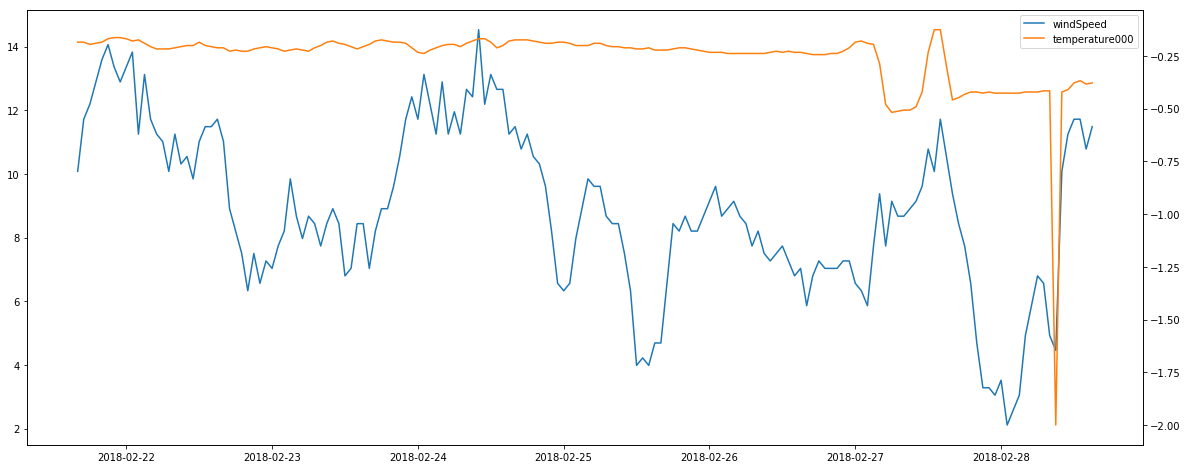

In [7]:
fig0, ax0 = plt.subplots(figsize=(20, 8))
ax1 = ax0.twinx()
h0 = ax0.plot(df.windSpeed)
h1 = ax1.plot(df.temperature000, color='C1')


lns = h0 + h1
labs = [l.get_label() for l in lns]
ax0.legend(lns, labs, loc=0);

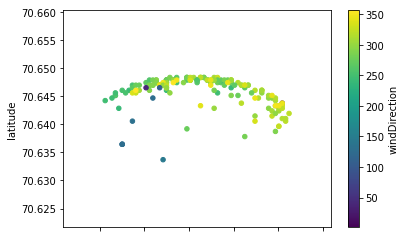

In [8]:
df.plot(x='longitude', y='latitude', c='windDirection', kind='scatter', cmap='viridis')